<a href="https://colab.research.google.com/github/aman-m4/Machine-Learning-2024/blob/main/Notebooks/ML_project_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

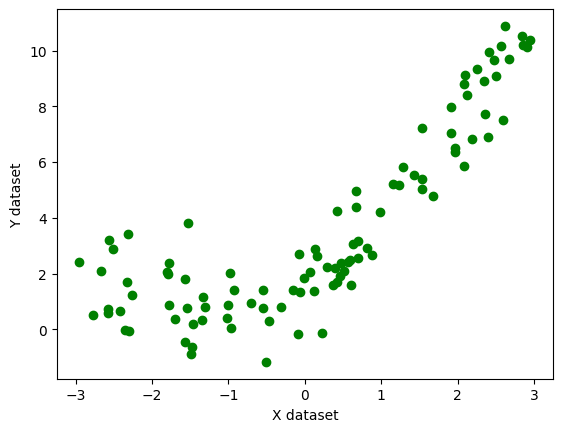

In [66]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

The random_state parameter in train_test_split serves a crucial purpose: it controls the shuffling of your data before the split happens. Here's why it's important:

1. Reproducibility: By setting a specific value for random_state (like 42, 0, or any other integer), you ensure that the same random shuffling is applied every time you run your code. This means you'll get the exact same training and testing sets each time, making your experiments reproducible.

2. Comparison: If you want to compare the performance of different models or try different hyperparameters, it's essential to keep the data splits consistent. Otherwise, you wouldn't know if the differences you see are due to the models or simply random variations in the data split.

3. Debugging: When you encounter issues or unexpected results, being able to reproduce the exact data split can help you isolate the problem and track down the source of the error.

In [68]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [69]:
regression_1.fit(X_train,y_train) # the regresiion algorithm learn the patterns between the features and output here

LinearRegression()

In [70]:
from sklearn.metrics import r2_score # we use r2 score here so that we get the positive scores
score=r2_score(y_test,regression_1.predict(X_test)) #here we compare the y_test(real answers) from the predictions made from X_test data
print(score)

0.6630445528943968


We observe here that the linear regression score is very less and the model is not able to fit the correct line based on the data points. Hence after loioking at the distribution it looks more like a mpolkynomial curve(similar to MSE curve we see in performance metyrics)

Text(0, 0.5, 'Y')

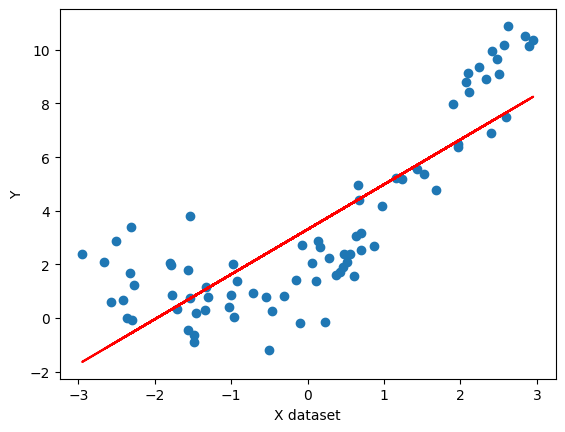

In [84]:
plt.plot(X_train,regression_1.predict(X_train),color='r') # so here we plt the predictions odf X_train in the red line
plt.scatter(X_train,y_train) # here with the scatter plt we see how our model performs on our trian data and compare the X_train and y_train data
plt.xlabel('X dataset')
plt.ylabel('Y')

In [72]:
#Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [73]:
poly = PolynomialFeatures(degree = 2, include_bias = True) #the degree here shows the number of features that the model creates. It works on the incremental quadratic function like b1 + b1x1 +b1x1^2 + b1x2^2
X_train_poly= poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) # we try to make sure that the model knows NOTHING from the train set. Thats why we use only transform. Using this the transform method is just extracting the deviation and mean from the training dataset.

In [74]:
X_train_poly

array([[ 1.00000000e+00,  2.84048694e+00,  8.06836607e+00],
       [ 1.00000000e+00, -1.46114718e+00,  2.13495109e+00],
       [ 1.00000000e+00,  2.11877060e+00,  4.48918885e+00],
       [ 1.00000000e+00, -7.65686368e-02,  5.86275614e-03],
       [ 1.00000000e+00, -2.94867957e+00,  8.69471120e+00],
       [ 1.00000000e+00,  1.32014510e-01,  1.74278307e-02],
       [ 1.00000000e+00,  6.01918227e-01,  3.62305552e-01],
       [ 1.00000000e+00,  2.41095176e+00,  5.81268840e+00],
       [ 1.00000000e+00,  2.30358036e-01,  5.30648249e-02],
       [ 1.00000000e+00,  2.48002366e+00,  6.15051737e+00],
       [ 1.00000000e+00,  6.31514545e-01,  3.98810621e-01],
       [ 1.00000000e+00, -2.66363763e+00,  7.09496541e+00],
       [ 1.00000000e+00, -1.00782928e+00,  1.01571987e+00],
       [ 1.00000000e+00, -1.02439656e+00,  1.04938832e+00],
       [ 1.00000000e+00, -1.70313204e+00,  2.90065876e+00],
       [ 1.00000000e+00, -1.80454887e+00,  3.25639663e+00],
       [ 1.00000000e+00,  1.97081105e+00

In [75]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train) # Now we fit the new polyonimal feature X_treian_poly to the linear regression model
y_pred = regression.predict(X_test_poly) # storing the predictions in y_pred
score=r2_score(y_test,y_pred) # comparing the score against y_pred
print(score)

0.866978337791692


We observe here that the score is much higher than linear regression. It concludes that dfor this dataset its better to use polynomiakl features to fit as a training data

In [76]:
print(regression.coef_)

[[0.         1.54078778 0.60673868]]


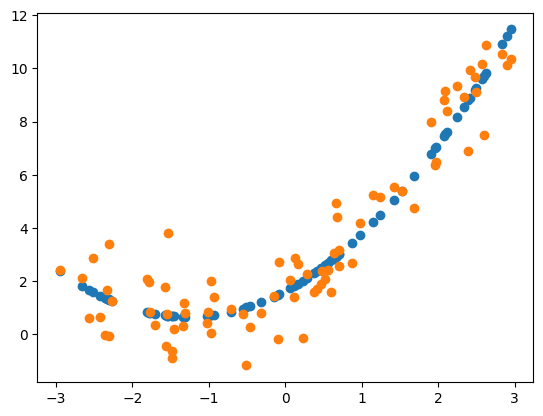

In [86]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [78]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly


array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

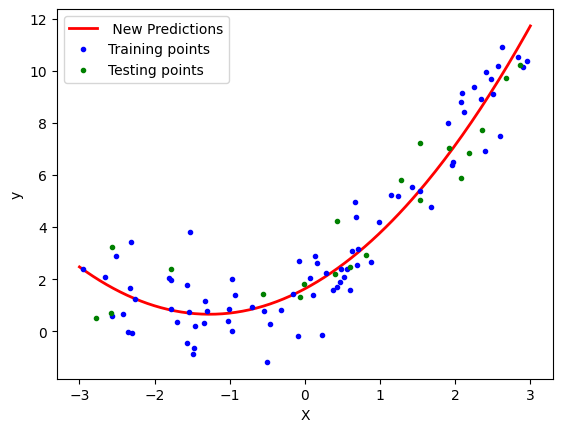

In [79]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

#Pipeline Concepts

In [80]:
from sklearn.pipeline import Pipeline

In [81]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()


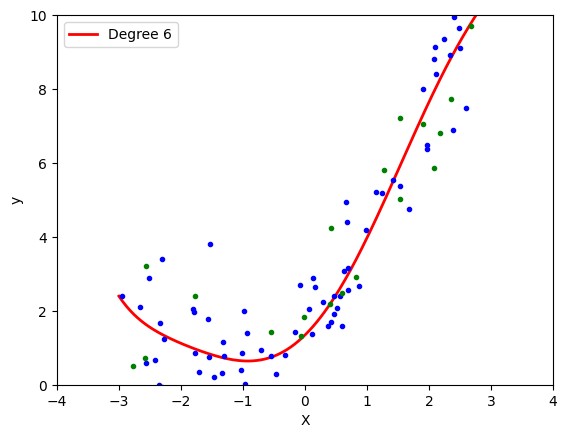

In [82]:
poly_regression(6)